In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns
import time
import xgboost as xgb
from unidecode import unidecode
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# EXTRACCION DE DATOS

He quitado un caracter de la contraseña de la api para que no funcione, ya que es de pago y no quiero pagar de más jeje.

In [ ]:
#Ids de liga y temporadas de los que quiero sacar Fixture_id y más info:
id_ligas = [140, 141]
temporadas = ['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015','2014', '2013', '2012']

#Datos que necesito: 

id_equipo_local = []
id_equipo_visitante = []
goles_local = []
goles_visitante = []
resultado = []
arbitro = []
fixture_id = []
fecha_timestamp = []
goles_descanso_local = []
goles_descanso_visitante = []
estadio = []
season = []

#Saco los datos de la API:

for id in id_ligas:
    for temporada in temporadas:
        
        url = "https://api-football-v1.p.rapidapi.com/v3/fixtures"

        querystring = {"league":id,"season":temporada}

        headers = {
            "X-RapidAPI-Key": "b78f5cd68cmsh17c6227cc19d104p1755afjsn96dc3357529",
            "X-RapidAPI-Host": "api-football-v1.p.rapidapi.com"
        }


        response = requests.request("GET", url, headers=headers, params=querystring).json()

        for a in range(len(response['response'])):
            if response['response'][a]['fixture']['status']['long'] == 'Match Finished':
                season.append(response['response'][a]['league']['season'])
                id_equipo_local.append(response['response'][a]['teams']['home']['id'])
                id_equipo_visitante.append(response['response'][a]['teams']['away']['id'])
                goles_local.append(response['response'][a]['goals']['home'])
                goles_visitante.append(response['response'][a]['goals']['away'])
                arbitro.append(response['response'][a]['fixture']['referee'])
                fixture_id.append(response['response'][a]['fixture']['id'])
                fecha_timestamp.append(response['response'][a]['fixture']['timestamp'])
                goles_descanso_local.append(response['response'][a]['score']['halftime']['home'])
                goles_descanso_visitante.append(response['response'][a]['score']['halftime']['away'])
                estadio.append(response['response'][a]['fixture']['venue']['name'])
                if response['response'][a]['goals']['home'] > response['response'][a]['goals']['away']:
                    resultado.append(1)
                elif response['response'][a]['goals']['home'] < response['response'][a]['goals']['away']:
                    resultado.append(2)
                elif response['response'][a]['goals']['home'] == response['response'][a]['goals']['away']:
                    resultado.append(0)



In [ ]:
datos_fixture = pd.DataFrame({
                               'id_equipo_local' : id_equipo_local,
                               'id_equipo_visitante' : id_equipo_visitante,
                               'goles_local' : goles_local,
                               'goles_visitante' : goles_visitante,
                                'resultado' : resultado,
                               'arbitro' : arbitro,
                               'fixture_id' : fixture_id,
                                'fecha_timestamp': fecha_timestamp,
                               'goles_descanso_local' : goles_descanso_local,
                               'goles_descanso_visitante' : goles_descanso_visitante,
                               'estadio' : estadio,
                                'season' : season
                                })

datos_fixture.to_csv('datos_generales_fx.csv', index= False)

In [ ]:
df_fx = pd.read_csv('datos_generales_fx.csv')
list_fx = df_fx['fixture_id'].tolist()

In [ ]:
shots_on_goal_local=[]
shots_on_goal_away=[]
shots_off_goal_local=[]
shots_off_goal_away=[]
total_shots_local=[]
total_shots_away=[]
blocked_shots_local=[]
blocked_shots_away=[]
shots_insidebox_local=[]
shots_insidebox_away=[]
shots_outsidebox_local=[]
shots_outsidebox_away=[]
fouls_local=[]
fouls_away=[]
corners_local=[]
corners_away=[]
offsides_local=[]
offsides_away=[]
ball_possession_local=[]
ball_possession_away=[]
yellow_cards_local=[]
yellow_cards_away=[]
red_cards_local=[]
red_cards_away=[]
goalkeeper_saves_local=[]
goalkeeper_saves_away=[]
pass_precision_local=[]
pass_precision_away=[]
fixture_id_2 = []



for fixture in list_fx:
    
    querystring = {"id":fixture}

    headers = {
        "X-RapidAPI-Key": "b78f5cd68cmsh17c6227cc19d104p1755afjsn96dc3357529",
        "X-RapidAPI-Host": "api-football-v1.p.rapidapi.com"
    }

    response = requests.request("GET", url, headers=headers, params=querystring).json()
    
    for a in range(len(response['response'])):
        fixture_id_2.append(fixture)
        try:
            shots_on_goal_local.append(response['response'][a]['statistics'][0]['statistics'][0]['value'])
        except:
            shots_on_goal_local.append(np.nan)
        try:
            shots_on_goal_away.append(response['response'][a]['statistics'][1]['statistics'][0]['value'])
        except:
            shots_on_goal_away.append(np.nan)
        try:
            shots_off_goal_local.append(response['response'][a]['statistics'][0]['statistics'][1]['value'])
        except:
            shots_off_goal_local.append(np.nan)
        try:
            shots_off_goal_away.append(response['response'][a]['statistics'][1]['statistics'][1]['value'])
        except:
            shots_off_goal_away.append(np.nan)
        try:
            total_shots_local.append(response['response'][a]['statistics'][0]['statistics'][2]['value'])
        except:
            total_shots_local.append(np.nan)
        try:
            total_shots_away.append(response['response'][a]['statistics'][1]['statistics'][2]['value'])
        except:
            total_shots_away.append(np.nan)
        try:
            blocked_shots_local.append(response['response'][a]['statistics'][0]['statistics'][3]['value'])
        except:
            blocked_shots_local.append(np.nan)
        try:
            blocked_shots_away.append(response['response'][a]['statistics'][1]['statistics'][3]['value'])
        except:
            blocked_shots_away.append(np.nan)
        try:
            shots_insidebox_local.append(response['response'][a]['statistics'][0]['statistics'][4]['value'])
        except:
            shots_insidebox_local.append(np.nan)
        try:
            shots_insidebox_away.append(response['response'][a]['statistics'][1]['statistics'][4]['value'])
        except:
            shots_insidebox_away.append(np.nan)
        try:
            shots_outsidebox_local.append(response['response'][a]['statistics'][0]['statistics'][5]['value'])
        except:
            shots_outsidebox_local.append(np.nan)
        try:
            shots_outsidebox_away.append(response['response'][a]['statistics'][1]['statistics'][5]['value'])
        except:
            shots_outsidebox_away.append(np.nan)
        try:
            fouls_local.append(response['response'][a]['statistics'][0]['statistics'][6]['value'])
        except:
            fouls_local.append(np.nan)
        try:
            fouls_away.append(response['response'][a]['statistics'][1]['statistics'][6]['value'])
        except:
            fouls_away.append(np.nan)
        try:
            corners_local.append(response['response'][a]['statistics'][0]['statistics'][7]['value'])
        except:
            corners_local.append(np.nan)
        try:
            corners_away.append(response['response'][a]['statistics'][1]['statistics'][7]['value'])
        except:
            corners_away.append(np.nan)
        try:
            offsides_local.append(response['response'][a]['statistics'][0]['statistics'][8]['value'])
        except:
            offsides_local.append(np.nan)
        try:
            offsides_away.append(response['response'][a]['statistics'][1]['statistics'][8]['value'])
        except:
            offsides_away.append(np.nan)
        try:
            ball_possession_local.append(response['response'][a]['statistics'][0]['statistics'][9]['value'])
        except:
            ball_possession_local.append(np.nan)
        try:
            ball_possession_away.append(response['response'][a]['statistics'][1]['statistics'][9]['value'])
        except:
            ball_possession_away.append(np.nan)
        try:
            yellow_cards_local.append(response['response'][a]['statistics'][0]['statistics'][10]['value'])
        except:
            yellow_cards_local.append(np.nan)
        try:
            yellow_cards_away.append(response['response'][a]['statistics'][1]['statistics'][10]['value'])
        except:
            yellow_cards_away.append(np.nan)
        try: 
            red_cards_local.append(response['response'][a]['statistics'][0]['statistics'][11]['value'])
        except:
            red_cards_local.append(np.nan)
        try:
            red_cards_away.append(response['response'][a]['statistics'][1]['statistics'][11]['value'])
        except:
            red_cards_away.append(np.nan)
        try:
            goalkeeper_saves_local.append(response['response'][a]['statistics'][0]['statistics'][12]['value'])
        except:
            goalkeeper_saves_local.append(np.nan)
        try:
            goalkeeper_saves_away.append(response['response'][a]['statistics'][1]['statistics'][12]['value'])
        except:
            goalkeeper_saves_away.append(np.nan)
        try:
            pass_precision_local.append(response['response'][a]['statistics'][0]['statistics'][13]['value'])
        except:
            pass_precision_local.append(np.nan)
        try:
            pass_precision_away.append(response['response'][a]['statistics'][1]['statistics'][13]['value'])
        except:
            pass_precision_away.append(np.nan)
        
        time.sleep(0.2)

In [ ]:
df_estadisticas = pd.DataFrame({
                                'shots_on_goal_local':shots_on_goal_local,
                                'shots_on_goal_away':shots_on_goal_away,
                                'shots_off_goal_local':shots_off_goal_local,
                                'shots_off_goal_away':shots_off_goal_away,
                                'total_shots_local':total_shots_local,
                                'total_shots_away':total_shots_away,
                                'blocked_shots_local':blocked_shots_local,
                                'blocked_shots_away':blocked_shots_away,
                                'shots_insidebox_local':shots_insidebox_local,
                                'shots_insidebox_away':shots_insidebox_away,
                                'shots_outsidebox_local':shots_outsidebox_local,
                                'shots_outsidebox_away':shots_outsidebox_away,
                                'fouls_local':fouls_local,
                                'fouls_away':fouls_away,
                                'corners_local':corners_local,
                                'corners_away':corners_away,
                                'offsides_local':offsides_local,
                                'offsides_away':offsides_away,
                                'ball_possession_local':ball_possession_local,
                                'ball_possession_away':ball_possession_away,
                                'yellow_cards_local':yellow_cards_local,
                                'yellow_cards_away':yellow_cards_away,
                                'red_cards_local':red_cards_local,
                                'red_cards_away':red_cards_away,
                                'goalkeeper_saves_local':goalkeeper_saves_local,
                                'goalkeeper_saves_away':goalkeeper_saves_away,
                                'pass_precision_local':pass_precision_local,
                                'pass_precision_away':pass_precision_away,
                                'fixture_id_2':fixture_id_2
})

df_estadisticas.to_csv('df_estadisticas.csv', index=False)

In [ ]:
id_lesionado = []
name_lesionado = []
fixture_id = []


for fixture in list_fx:

    url = "https://api-football-v1.p.rapidapi.com/v3/injuries"

    querystring = {"fixture":fixture}

    headers = {
    "X-RapidAPI-Key": "b78f5cd68cmsh17c6227cc19d104p1755afjsn96dc3357529",
    "X-RapidAPI-Host": "api-football-v1.p.rapidapi.com"
    }

    response = requests.request("GET", url, headers=headers, params=querystring).json()

    for a in range(len(response['response'])):
        id_lesionado.append(response['response'][a]['player']['id'])
        name_lesionado.append(response['response'][a]['player']['name'])
        fixture_id.append(fixture)
        time.sleep(0.1)

In [ ]:
df_lesionados = pd.DataFrame({
                                'fixture_id':fixture_id,
                                'id_lesionado':id_lesionado,
                                'name_lesionado':name_lesionado
                                
})

df_lesionados.to_csv('datos_lesionados.csv', index= False)

In [ ]:
fixture_id = []
formacion = []
id_jugador_titular = []
name_jugador_titular = []


for fixture in list_fx:
    try:
        url = "https://api-football-v1.p.rapidapi.com/v3/fixtures/lineups"

        querystring = {"fixture":fixture}

        headers = {
            "X-RapidAPI-Key": "b78f5cd68cmsh17c6227cc19d104p1755afjsn96dc3357529",
            "X-RapidAPI-Host": "api-football-v1.p.rapidapi.com"
        }

        response = requests.request("GET", url, headers=headers, params=querystring).json()

        for a in range(len(response['response'])):
            for b in range(len(response['response'][a]['startXI'])):
                id_jugador_titular.append(response['response'][a]['startXI'][b]['player']['id'])
                name_jugador_titular.append(response['response'][a]['startXI'][b]['player']['name'])
                formacion.append(response['response'][a]['formation'])
                fixture_id.append(fixture)
    except Exception as Ex:
        print(Ex)

In [ ]:
df_alineaciones = pd.DataFrame({
                                'fixture_id':fixture_id,
                                'id_jugador_titular':id_jugador_titular,
                                'name_jugador_titular':name_jugador_titular
})

df_alineaciones.to_csv('datos_alineaciones.csv', index= False)

In [ ]:
id_jugador = []
nombre_jugador = []
equipo_jugador = []
id_equipo = []
temporada_equipo = []

#ligas que me interesan y las temporadas a mirar
id_ligas = [140, 141]
temporadas = ['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015','2014', '2013', '2012']

for id in id_ligas:
    for temporada in temporadas:
        page = 1  # empezamos en la primera página
        more_pages = True  # variable para controlar si hay más páginas o no
        while more_pages:
            url = "https://api-football-v1.p.rapidapi.com/v3/players"

            querystring = {"league": id, "season": temporada, "page": page}

            headers = {
                "X-RapidAPI-Key": "b78f5cd68cmsh17c6227cc19d104p1755afjsn96dc3357529",
                "X-RapidAPI-Host": "api-football-v1.p.rapidapi.com"
            }

            response = requests.request("GET", url, headers=headers, params=querystring).json()

            for a in range(len(response['response'])):
                id_jugador.append(response['response'][a]['player']['id'])
                nombre_jugador.append(response['response'][a]['player']['name'])
                equipo_jugador.append(response['response'][a]['statistics'][0]['team']['name'])
                id_equipo.append(response['response'][a]['statistics'][0]['team']['id'])
                temporada_equipo.append(response['parameters']['season'])

            # comprobamos si hay más páginas en los resultados
            if response['paging']['current'] < response['paging']['total']:
                page += 1  # pasamos a la siguiente página
            else:
                more_pages = False  # no hay más páginas, terminamos el bucle




In [ ]:
df_diccionario = pd.DataFrame({
                                'id_jugador':id_jugador,
                                'nombre_jugador':nombre_jugador,
                                'equipo_jugador':equipo_jugador,
                                'id_equipo':id_equipo,
                                'temporada_equipo':temporada_equipo
    })

In [ ]:
df_diccionario.to_csv('df_diccionario_jugadores.csv', index = False)

# PROCESAMIENTO DE DF LESIONADOS

In [2]:
def procesado_lesionados(df):
    #Añade una fila de 1 para identificar que ese jugador ha estado lesionado en algún momento
    df['lesionados'] = pd.Series(np.ones(len(df)), index=df.index)
    
    
    df_lesionados_id = df[['fixture_id', 'id_lesionado', 'lesionados']]
    
    #Elimino fila si hay missings en la columna de id_jugador_titular
    df_lesionados_id = df_lesionados_id.dropna(subset=['id_lesionado'])
    
    #Pivota la tabla para convertir en una variable cada jugador. Para los partidos que el jugador no ha estado lesionado,
    #se rellenará con un '0'. Dejo el índice de la forma correcta.
    df_lesionados_id = df_lesionados_id.pivot( index= 'fixture_id', 
                                              columns = 'id_lesionado', 
                                              values = 'lesionados').fillna(0).reset_index()
    df_lesionados_id.columns.name = None
    
    #Transformo los valores '1' y '0' a int.
    df_lesionados_id.iloc[:,1:] =df_lesionados_id.iloc[:,1:].astype(int)
    
    #Añado al nombre de las variables de los id de jugadores 'les-' para identificar que es la variable de lesionados.
    df_lesionados_id = df_lesionados_id.rename(columns={col: f'les-{col}' for col in df_lesionados_id.iloc[:,1:]})
    
    return df_lesionados_id

# PROCESAMIENTO DF DE ALINEACIONES

In [3]:
def procesado_titulares(df):
    #Añade una fila de 1 para identificar que ese jugador ha estado lesionado en algún momento
    df['titular'] = pd.Series(np.ones(len(df)), index=df.index)
    
    
    df_alineaciones_id = df[['fixture_id', 'id_jugador_titular', 'titular']]
    #Elimino fila si hay missings en la columna de id_jugador_titular
    df_alineaciones_id = df_alineaciones_id.dropna(subset=['id_jugador_titular'])
    #Pivota la tabla para convertir en una variable cada jugador. Para los partidos que el jugador no ha estado lesionado,
    #se rellenará con un '0'. Dejo el índice de la forma correcta.
    df_alineaciones_id = df_alineaciones_id.pivot( index= 'fixture_id', 
                                              columns = 'id_jugador_titular', 
                                              values = 'titular').fillna(0).reset_index()
    df_alineaciones_id.columns.name = None
    
    #Me cargo un jugador con id nulo (hay que revisarlo después del procesado)
    df_alineaciones_id = df_alineaciones_id.drop(df_alineaciones_id.columns[1], axis=1)
    
    #Transformo los valores '1' y '0' a int.
    df_alineaciones_id.iloc[:,1:]=df_alineaciones_id.iloc[:,1:].astype(int)
    
    #Añado al nombre de las variables de los id de jugadores 'les-' para identificar que es la variable de lesionados.
    df_alineaciones_id = df_alineaciones_id.rename(columns={col: f'titu-{col}' for col in df_alineaciones_id.iloc[:,1:]})
    
    return df_alineaciones_id

# Procesamiento estadisticas

In [4]:
def procesado_estadisticas(df):
    #Elimino las filas en las que la API no me devuelve un solo valor(ha pasado)
    rows_with_all_missing = df.iloc[:, :-1].isna().all(axis=1)
    df = df[~rows_with_all_missing]
    #Renombro dos columnas mal nombradas (no es el dato que dice la columna)
    df = df.rename(columns={'pass_precision_local': 'total_pass_local',
                            'pass_precision_away': 'total_pass_away',
                           'fixture_id_2': 'fixture_id'})
    #Transformo los datos de posesion a float para poder usarlos de forma más sencilla
    df['ball_possession_local'] = df['ball_possession_local'].str.replace('%','').astype(float)
    df['ball_possession_away'] = df['ball_possession_away'].str.replace('%', '').astype(float)

    df['ball_possession_local'] = df['ball_possession_local']/100
    df['ball_possession_away'] = df['ball_possession_away']/100
    # Convertir columna a tipo numérico. Esto es porque en las tarjetas amarillas habia datos erroneos (con porcntaje)
    df['yellow_cards_local'] = pd.to_numeric(df['yellow_cards_local'], errors='coerce')
    df['yellow_cards_away'] = pd.to_numeric(df['yellow_cards_away'], errors='coerce')

    # Filtro filas con NaN en la columna en cuestión y las elimino
    rows_with_nan = df['yellow_cards_local'].isna() | df['yellow_cards_away'].isna()
    df = df[~rows_with_nan]
    #Cambio los missings por 0, ya que cuando el valor es 0 la api devuelve null.
    df.fillna(0, inplace = True)
    #Cambio todas las columnas que quiero que sean número entero para trabajar mejor con ellos
    cols_to_int = ['shots_on_goal_local', 'shots_on_goal_away', 'shots_off_goal_local', 'shots_off_goal_away', 
               'total_shots_local', 'total_shots_away', 'blocked_shots_local', 'blocked_shots_away', 
               'shots_insidebox_local', 'shots_insidebox_away', 'shots_outsidebox_local', 'shots_outsidebox_away', 
               'fouls_local', 'fouls_away', 'corners_local', 'corners_away', 'offsides_local', 'offsides_away', 
               'yellow_cards_local', 'yellow_cards_away', 'red_cards_local', 'red_cards_away', 'goalkeeper_saves_local', 
               'goalkeeper_saves_away', 'total_pass_local', 'total_pass_away']
    df[cols_to_int] = df[cols_to_int].astype(int)
    
    return df
    

# Procesamiento datos partidos

In [5]:
def procesado_datos_partidos_inicial(df):
    #Sustituimos los missings por 0, ya que esos missings significa que ha habido 0 goles
    df['goles_descanso_local'] = df['goles_descanso_local'].fillna(0)
    df['goles_descanso_visitante'] = df['goles_descanso_visitante'].fillna(0)
    #Cambio el tipo de float a int, ya que no puede haber goles decimales
    df['goles_descanso_local'] = df['goles_descanso_local'].astype(int)
    df['goles_descanso_visitante'] = df['goles_descanso_visitante'].astype(int)
    #for i, row in df.iterrows():
    #    if row['resultado'] == 0:
    #        df.at[i, 'resultado'] = 3

    return df

# Buscador de IDs para introduccion de nuevos datos

Tanto la función de buscar_jugador como la de buscar_equipo, devuelven una tabla con los ids de jugador/equipo solicitado. No hace falta introducir el nombre exacto, tal y como esta en la BBDD, devolverá opciones en función de coincidencias. Para ahorrar tiempo, se puede introducir tanto una cadena de texto, como una lista de nombres de jugadores/equipos, que va a devolver todo lo que introduzcamos.

También he añadido con el mismo formato un buscador de arbitro y estadio para que se añada a los datos nuevos con el formato adecuado.

In [32]:
def buscar_jugador(id_equipo, temporada_equipo):
    df = pd.read_csv('../data/raw_files/df_diccionario_jugadores.csv')
     # Filtre el DataFrame original utilizando los valores de los parámetros
    filtro = (df['id_equipo'] == id_equipo) & (df['temporada_equipo'] == temporada_equipo)
    df_filtrado = df[filtro]
    # Devuelva el DataFrame filtrado
    return df_filtrado

In [33]:
def buscar_equipo(nombres):
    # Cargo el diccionario de ids que tengo y fue descargado. Es el mismo que de jugadores
    equipos = pd.read_csv("../data/raw_files/df_diccionario_jugadores.csv")
     # Elimino acentos de los nombres de los equipos en el DataFrame aplicando unidecode. También se quedan en minúsculas
    equipos['nombre_equipo'] = equipos['equipo_jugador'].apply(lambda x: unidecode(x.lower()))
    
    if isinstance(nombres, str):
        # Eliminar las marcas diacríticas del nombre introducido
        equipo = unidecode(nombres.lower())
        # Busco los equipos cuyo nombre contenga la cadena de texto introducida como parámetro
        equipos_coincidentes = equipos[equipos['nombre_equipo'].str.contains(nombres, case=False)]
        #Elimino los jugadores duplicados, porque pueden salir jugadores repetidos si participaron más de 1 temporada
        equipos_coincidentes = equipos_coincidentes.drop_duplicates(subset='id_equipo')
        # Devuelve una tabla con los nombres y los ids de los jugadores encontrados
        return equipos_coincidentes[['nombre_equipo', 'id_equipo']]
    
    elif isinstance(nombres, list):
        resultados = []
        # Busco cada id de los jugadores en la lista
        for n in nombres:
            # Elimino acentos del nombre introducido
            equipo = unidecode(n.lower())
            # Busco los jugadores cuyo nombre contenga la cadena de texto introducida como parámetro
            equipos_coincidentes = equipos[equipos['nombre_equipo'].str.contains(n, case=False)]
            # Elimino jugadores duplicados en función del id
            equipos_coincidentes = equipos_coincidentes.drop_duplicates(subset='id_equipo')
            # Añado los resultados a la lista de resultados
            for i, row in equipos_coincidentes.iterrows():
                resultados.append([row['nombre_equipo'], row['id_equipo']])
        # Devuelvo una tabla con los nombres y los IDs de los jugadores encontrados
        return pd.DataFrame(resultados, columns=['nombre_equipo', 'id_equipo'])
    
    else: return 'Introduce una lista de nombres o un nombre único'

In [34]:
def nombre_arbitro_correcto(nombre):
    arbitros = pd.read_csv("../data/processed_files/df_datos_completos.csv")

    # Elimino los acentos del nombre introducido
    arbitro = unidecode(nombre.lower())
    # Busco los equipos cuyo nombre contenga la cadena de texto introducida como parámetro
    arbitros_coincidentes = arbitros[arbitros['arbitro'].str.contains(nombre, case=False)]
    #Elimino los arbitros duplicados, porque pueden salir árbitros repetidos si participaron más de 1 temporada
    arbitros_coincidentes = arbitros_coincidentes.drop_duplicates(subset='arbitro')
    if len(arbitros_coincidentes) == 0:
        return None
    else:
        # Obtengo el índice de la fila correspondiente al árbitro
        indice = arbitros_coincidentes.index[0]
        # Obtengo el nombre del árbitro con el formato adecuado
        nombre_completo = arbitros.loc[indice, 'arbitro']
        # Devuelve el nombre del árbitro con el formato adecuado
        return nombre_completo


In [35]:
def nombre_estadio_correcto(nombre):
    estadios = pd.read_csv("../data/processed_files/df_datos_completos.csv")
    # Elimino los acentos del nombre introducido
    estadio = unidecode(nombre.lower())
    # Busco los equipos cuyo nombre contenga la cadena de texto introducida como parámetro
    estadios_coincidentes = estadios[estadios['estadio'].str.contains(nombre, case=False)]
    #Elimino los arbitros duplicados, porque pueden salir estadios repetidos si participaron más de 1 temporada
    estadios_coincidentes = estadios_coincidentes.drop_duplicates(subset='estadio')
    if len(estadios_coincidentes) == 0:
        return None
    else:
        # Obtengo el índice de la fila correspondiente al estadio
        indice = estadios_coincidentes.index[0]
        # Obtengo el nombre del estadio con el formato adecuado
        nombre_completo = estadios.loc[indice, 'estadio']
        # Devuelve el nombre del estadio con el formato adecuado
        return nombre_completo

# Unión de DataFrames y creación del nuevo

In [10]:
def creacion_df_final():
    #Transformación de los DataFrames llamando a las funciones anteriores
    df_tr_lesionados = procesado_lesionados(pd.read_csv('datos_lesionados.csv'))
    df_tr_alineaciones = procesado_titulares(pd.read_csv('datos_alineaciones.csv'))
    df_tr_datos_partidos = procesado_datos_partidos_inicial(pd.read_csv('datos_generales_fx.csv'))
    df_tr_estadisticas= procesado_estadisticas(pd.read_csv('df_estadisticas.csv'))
    
    #Comenzamos la unión de dataframes, empezando por los datos de partidos y estadísticas
    df_final = pd.merge(df_tr_datos_partidos, df_tr_estadisticas, on='fixture_id', how='left')
    
    #Elimino las filas en las que la API no me devuelve un solo valor(ha pasado)
    rows_with_all_missing = df_final.loc[:, 'shots_on_goal_local':].isna().all(axis=1)
    df_final = df_final[~rows_with_all_missing]
    
    #Unimos el df resultante con el de lesionados
    df_final = pd.merge(df_final,df_tr_lesionados, on='fixture_id', how = 'left')
    #Relleno los missings con 0, ya que significa que en esos partidos no ha habido lesionados
    df_final = df_final.fillna(0)
    
    #Unimos el df_final con el de alineaciones, que es el que faltaría.
    df_final = pd.merge(df_final, df_tr_alineaciones, on='fixture_id', how='left')
    #Relleno los missings con 0, ya que significa que en esos partidos no habría participado ese jugador
    df_final = df_final.fillna(0)
    df_final = df_final.reset_index()
    
    #Para agilizar tiempos en métedos que necesitan esta tabla para usarse, ya que tarda un poco en ejecutarse.
    df_final.to_csv('df_partidos_completo.csv', index=False)
    
    return df_final

# Nuevas variables interesantes

In [11]:
def creacion_nuevas_variables():
    
    df= pd.read_csv('../data/processed_files/df_datos_completos.csv') 
    
    df['goles_local_previos'] =   df.groupby('id_equipo_local')['goles_local'].shift(1) + \
                                  df.groupby('id_equipo_local')['goles_local'].shift(2) + \
                                  df.groupby('id_equipo_local')['goles_local'].shift(3)
    
    df['tiros_local_previos'] =   df.groupby('id_equipo_local')['total_shots_local'].shift(1) + \
                                  df.groupby('id_equipo_local')['total_shots_local'].shift(2) + \
                                  df.groupby('id_equipo_local')['total_shots_local'].shift(3)

    df['goles_local_previos'] = df['goles_local_previos'].fillna(df.groupby('id_equipo_local')['goles_local'].shift(-1))
    df['tiros_local_previos'] = df['tiros_local_previos'].fillna(df.groupby('id_equipo_local')['total_shots_local'].shift(-1))


    df['tiros_para_marcar_local'] = np.where(df['goles_local_previos'] == 0, 
                                        df['tiros_local_previos'], 
                                        df['tiros_local_previos'] / df['goles_local_previos'])
    
    df['goles_away_previos'] =    df.groupby('id_equipo_visitante')['goles_visitante'].shift(1) + \
                                  df.groupby('id_equipo_visitante')['goles_visitante'].shift(2) + \
                                  df.groupby('id_equipo_visitante')['goles_visitante'].shift(3)

    
    df['tiros_away_previos'] =    df.groupby('id_equipo_visitante')['total_shots_away'].shift(1) + \
                                  df.groupby('id_equipo_visitante')['total_shots_away'].shift(2) + \
                                  df.groupby('id_equipo_visitante')['total_shots_away'].shift(3)

    df['goles_away_previos'] = df['goles_away_previos'].fillna(df.groupby('id_equipo_visitante')['goles_visitante'].shift(-1))
    df['tiros_away_previos'] = df['tiros_away_previos'].fillna(df.groupby('id_equipo_visitante')['total_shots_away'].shift(-1))


    df['tiros_para_marcar_away'] = np.where(df['goles_away_previos'] == 0, 
                                        df['tiros_away_previos'], 
                                        df['tiros_away_previos'] / df['goles_away_previos'])

    df = df.drop(['tiros_away_previos','goles_away_previos','tiros_local_previos','goles_local_previos'], axis=1)
    
    df = df.sort_values(by='fecha_timestamp', ascending=True)
    
    df['tiros_para_marcar_local'] = df['tiros_para_marcar_local'].fillna(df['tiros_para_marcar_local'].mean())
    df['tiros_para_marcar_away'] = df['tiros_para_marcar_away'].fillna(df['tiros_para_marcar_away'].mean())

    
    
    return df


# Creación de datos nuevos para predecir

Esta función se puede probar con los siguientes datos que deben ser introducidos correctamente. Para saber cuales son las ids correspondientes, se usan las funciones anteriores. Para no fallar el nombre del arbitro/estadio, igual. Si es la temporada 2022/2023, se usa la season 2022.  
id_equipo_local = 541  
id_equipo_visitante = 530  
arbitro = 'Alejandro Hernandez, Spain'  
estadio = 'Estadio Santiago Bernabéu'  
season = 2022  
ids_lesionados = [505, 653, 117021, 10009, 739, 2472]  
ids_titulares = [730,2285,372,733,33653,756,752,754,1271,762,759,29,2669,39,6503,2923,50,926,753,59,56,735]

In [36]:
def creacion_datos_nuevos(id_equipo_local, id_equipo_visitante, arbitro, estadio, season, ids_lesionados, ids_titulares):
    #Leo el csv donde estan todos los datos completos de los partidos. Se ha creado con la función creacion_df_final()
    df_partidos = pd.read_csv('../data/processed_files/df_datos_completos.csv')
    
    #Creo los datos de estadisticas que se preveen con la media de datos de los últimos 3 partidos en casa o de visitante
    shots_on_goal_local = np.mean(df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'shots_on_goal_local'].shift(1) +  \
                              df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'shots_on_goal_local'].shift(2) +  \
                              df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'shots_on_goal_local'].shift(3))
    shots_on_goal_away = np.mean(df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'shots_on_goal_away'].shift(1) +  \
                                  df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'shots_on_goal_away'].shift(2) +  \
                                  df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'shots_on_goal_away'].shift(3))
    shots_off_goal_local = np.mean(df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'shots_off_goal_local'].shift(1) +  \
                                  df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'shots_off_goal_local'].shift(2) +  \
                                  df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'shots_off_goal_local'].shift(3))
    shots_off_goal_away = np.mean(df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'shots_off_goal_away'].shift(1) +  \
                                  df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'shots_off_goal_away'].shift(2) +  \
                                  df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'shots_off_goal_away'].shift(3))
    total_shots_local = np.mean(df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'total_shots_local'].shift(1) +  \
                                  df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'total_shots_local'].shift(2) +  \
                                  df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'total_shots_local'].shift(3))
    total_shots_away = np.mean(df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'total_shots_away'].shift(1) +  \
                                  df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'total_shots_away'].shift(2) +  \
                                  df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'total_shots_away'].shift(3))
    blocked_shots_local = np.mean(df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'blocked_shots_local'].shift(1) +  \
                                  df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'blocked_shots_local'].shift(2) +  \
                                  df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'blocked_shots_local'].shift(3))
    blocked_shots_away = np.mean(df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'blocked_shots_away'].shift(1) +  \
                                  df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'blocked_shots_away'].shift(2) +  \
                                  df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'blocked_shots_away'].shift(3))
    shots_insidebox_local = np.mean(df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'shots_insidebox_local'].shift(1) +  \
                                  df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'shots_insidebox_local'].shift(2) +  \
                                  df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'shots_insidebox_local'].shift(3))
    shots_insidebox_away = np.mean(df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'shots_insidebox_away'].shift(1) +  \
                                  df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'shots_insidebox_away'].shift(2) +  \
                                  df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'shots_insidebox_away'].shift(3))
    shots_outsidebox_local = np.mean(df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'shots_outsidebox_local'].shift(1) +  \
                                  df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'shots_outsidebox_local'].shift(2) +  \
                                  df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'shots_outsidebox_local'].shift(3))
    shots_outsidebox_away = np.mean(df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'shots_outsidebox_away'].shift(1) +  \
                                  df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'shots_outsidebox_away'].shift(2) +  \
                                  df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'shots_outsidebox_away'].shift(3))
    fouls_local = np.mean(df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'fouls_local'].shift(1) +  \
                                  df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'fouls_local'].shift(2) +  \
                                  df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'fouls_local'].shift(3))
    fouls_away = np.mean(df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'fouls_away'].shift(1) +  \
                                  df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'fouls_away'].shift(2) +  \
                                  df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'fouls_away'].shift(3))
    corners_local = np.mean(df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'corners_local'].shift(1) +  \
                                  df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'corners_local'].shift(2) +  \
                                  df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'corners_local'].shift(3))
    corners_away = np.mean(df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'corners_away'].shift(1) +  \
                                  df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'corners_away'].shift(2) +  \
                                  df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'corners_away'].shift(3))
    offsides_local = np.mean(df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'offsides_local'].shift(1) +  \
                                  df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'offsides_local'].shift(2) +  \
                                  df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'offsides_local'].shift(3))
    offsides_away = np.mean(df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'offsides_away'].shift(1) +  \
                                  df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'offsides_away'].shift(2) +  \
                                  df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'offsides_away'].shift(3))
    ball_possession_local = np.mean(df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'ball_possession_local'].shift(1) +  \
                                  df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'ball_possession_local'].shift(2) +  \
                                  df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'ball_possession_local'].shift(3))
    ball_possession_away = np.mean(df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'ball_possession_away'].shift(1) +  \
                                  df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'ball_possession_away'].shift(2) +  \
                                  df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'ball_possession_away'].shift(3))
    yellow_cards_local = np.mean(df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'yellow_cards_local'].shift(1) +  \
                                  df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'yellow_cards_local'].shift(2) +  \
                                  df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'yellow_cards_local'].shift(3))
    yellow_cards_away = np.mean(df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'yellow_cards_away'].shift(1) +  \
                                  df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'yellow_cards_away'].shift(2) +  \
                                  df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'yellow_cards_away'].shift(3))
    red_cards_local = np.mean(df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'red_cards_local'].shift(1) +  \
                                  df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'red_cards_local'].shift(2) +  \
                                  df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'red_cards_local'].shift(3))
    red_cards_away = np.mean(df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'red_cards_away'].shift(1) +  \
                                  df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'red_cards_away'].shift(2) +  \
                                  df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'red_cards_away'].shift(3))
    goalkeeper_saves_local = np.mean(df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'goalkeeper_saves_local'].shift(1) +  \
                                  df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'goalkeeper_saves_local'].shift(2) +  \
                                  df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'goalkeeper_saves_local'].shift(3))
    goalkeeper_saves_away = np.mean(df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'goalkeeper_saves_away'].shift(1) +  \
                                  df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'goalkeeper_saves_away'].shift(2) +  \
                                  df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'goalkeeper_saves_away'].shift(3))
    total_pass_local = np.mean(df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'total_pass_local'].shift(1) +  \
                                  df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'total_pass_local'].shift(2) +  \
                                  df_partidos.loc[df_partidos['id_equipo_local'] == id_equipo_local, 'total_pass_local'].shift(3))
    total_pass_away = np.mean(df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'total_pass_away'].shift(1) +  \
                                  df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'total_pass_away'].shift(2) +  \
                                  df_partidos.loc[df_partidos['id_equipo_visitante'] == id_equipo_visitante, 'total_pass_away'].shift(3))
    
    #Creo un dataframe de solo estadísticas más los datos de arbitro, estadio, ids, season (todos menos lesionados y titulares)
    df_datos_nuevos = pd.DataFrame({
                                      'id_equipo_local': id_equipo_local,
                                        'id_equipo_visitante': id_equipo_visitante,
                                        'arbitro': arbitro,
                                        'estadio': estadio,
                                        'season': season,
                                      'shots_on_goal_local':shots_on_goal_local,
                                      'shots_on_goal_away':shots_on_goal_away,
                                      'shots_off_goal_local':shots_off_goal_local,
                                      'shots_off_goal_away':shots_off_goal_away,
                                      'total_shots_local':total_shots_local,
                                      'total_shots_away':total_shots_away,
                                      'blocked_shots_local':blocked_shots_local,
                                      'blocked_shots_away':blocked_shots_away,
                                      'shots_insidebox_local':shots_insidebox_local,
                                      'shots_insidebox_away':shots_insidebox_away,
                                      'shots_outsidebox_local':shots_outsidebox_local,
                                      'shots_outsidebox_away':shots_outsidebox_away,
                                      'fouls_local':fouls_local,
                                      'fouls_away':fouls_away,
                                      'corners_local':corners_local,
                                      'corners_away':corners_away,
                                      'offsides_local':offsides_local,
                                      'offsides_away':offsides_away,
                                      'ball_possession_local':ball_possession_local,
                                      'ball_possession_away':ball_possession_away,
                                      'yellow_cards_local':yellow_cards_local,
                                      'yellow_cards_away':yellow_cards_away,
                                      'red_cards_local':red_cards_local,
                                      'red_cards_away':red_cards_away,
                                      'goalkeeper_saves_local':goalkeeper_saves_local,
                                      'goalkeeper_saves_away':goalkeeper_saves_away,
                                      'total_pass_local':total_pass_local,
                                      'total_pass_away':total_pass_away
                                    }, index = [0])
    
    #Creo un dataframe solo con las columnas de lesionados y las relleno con 0 todas
    #Primero localizo todas las columnas de df_partidos
    columns_les = []
    for col in df_partidos.columns:
        if 'les-' in col:
            columns_les.append(col)
    #Relleno con 0 y creo el dataframe de lesionados
    valores = {col: 0 for col in columns_les}
    df_lesionados_nuevos = pd.DataFrame([valores])
    
    #Hago el mismo proceso con un dataframe de titulares
    columns_titus = []
    for col in df_partidos.columns:
        if 'titu-' in col:
            columns_titus.append(col)
    valores_titu = {col: 0 for col in columns_titus}
    df_titulares_nuevos = pd.DataFrame([valores_titu])
    
    #Concateno los 3 dataframe para obtener el dataframe de datos final
    df_datos_nuevos_final = pd.concat([df_datos_nuevos, df_lesionados_nuevos,df_titulares_nuevos], axis = 1)
    
    #Añado los prefijos y sufijos necesarios para localizar los ids de lesionados y titulares en la tabla
    ids_lesionado_prefijo = ['les-{}'.format(id) for id in ids_lesionados]
    ids_titular_prefijo = ['titu-{}{}'.format(id,'.0') for id in ids_titulares]
    
    #Y sustituyo el valor correspondiente por 1, ya que o estan lesionados en ese partido o van a jugar
    for id_les in ids_lesionado_prefijo:
        df_datos_nuevos_final.loc[0, id_les] = 1
    for id_titu in ids_titular_prefijo:
        df_datos_nuevos_final.loc[0, id_titu] = 1
        
    #Aquí añado las nuevas variables que me parecieron interesantes siguiendo el mismo código que como las cree en el método anterior    
    df_datos_nuevos_final['goles_local_previos'] = df_partidos.groupby('id_equipo_local')['goles_local'].shift(1) + \
                                  df_partidos.groupby('id_equipo_local')['goles_local'].shift(2) + \
                                  df_partidos.groupby('id_equipo_local')['goles_local'].shift(3)

    df_datos_nuevos_final['tiros_local_previos'] = df_partidos.groupby('id_equipo_local')['total_shots_local'].shift(1) + \
                                      df_partidos.groupby('id_equipo_local')['total_shots_local'].shift(2) + \
                                      df_partidos.groupby('id_equipo_local')['total_shots_local'].shift(3)

    df_datos_nuevos_final['goles_local_previos'] = df_datos_nuevos_final['goles_local_previos'].fillna(df_partidos.groupby('id_equipo_local')['goles_local'].shift(-1))
    df_datos_nuevos_final['tiros_local_previos'] = df_datos_nuevos_final['tiros_local_previos'].fillna(df_partidos.groupby('id_equipo_local')['total_shots_local'].shift(-1))

    df_datos_nuevos_final['tiros_para_marcar_local'] = np.where(df_datos_nuevos_final['goles_local_previos'] == 0, 
                                            df_datos_nuevos_final['tiros_local_previos'], 
                                            df_datos_nuevos_final['tiros_local_previos'] / df_datos_nuevos_final['goles_local_previos'])

    df_datos_nuevos_final['goles_away_previos'] = df_partidos.groupby('id_equipo_visitante')['goles_visitante'].shift(1) + \
                                      df_partidos.groupby('id_equipo_visitante')['goles_visitante'].shift(2) + \
                                      df_partidos.groupby('id_equipo_visitante')['goles_visitante'].shift(3)

    df_datos_nuevos_final['tiros_away_previos'] = df_partidos.groupby('id_equipo_visitante')['total_shots_away'].shift(1) + \
                                      df_partidos.groupby('id_equipo_visitante')['total_shots_away'].shift(2) + \
                                      df_partidos.groupby('id_equipo_visitante')['total_shots_away'].shift(3)

    df_datos_nuevos_final['goles_away_previos'] = df_datos_nuevos_final['goles_away_previos'].fillna(df_partidos.groupby('id_equipo_visitante')['goles_visitante'].shift(-1))
    df_datos_nuevos_final['tiros_away_previos'] = df_datos_nuevos_final['tiros_away_previos'].fillna(df_partidos.groupby('id_equipo_visitante')['total_shots_away'].shift(-1))

    df_datos_nuevos_final['tiros_para_marcar_away'] = np.where(df_datos_nuevos_final['goles_away_previos'] == 0, 
                                            df_datos_nuevos_final['tiros_away_previos'], 
                                            df_datos_nuevos_final['tiros_away_previos'] / df_datos_nuevos_final['goles_away_previos'])

    df_datos_nuevos_final = df_datos_nuevos_final.drop(['tiros_away_previos','goles_away_previos','tiros_local_previos','goles_local_previos'], axis=1)

    df_datos_nuevos_final['tiros_para_marcar_local'] = df_datos_nuevos_final['tiros_para_marcar_local'].fillna(df_datos_nuevos_final['tiros_para_marcar_local'].mean())
    df_datos_nuevos_final['tiros_para_marcar_away'] = df_datos_nuevos_final['tiros_para_marcar_away'].fillna(df_datos_nuevos_final['tiros_para_marcar_away'].mean())

    
    return df_datos_nuevos_final

In [37]:
buscar_equipo(['real soc', 'cadiz'])

,nombre_equipo,id_equipo
0,real sociedad,548
1,real sociedad ii,9585
2,cadiz,724


In [40]:
nombre_arbitro_correcto('Mateu')

'Antonio Mateu, Spain'

In [41]:
nombre_estadio_correcto('reale')

'Reale Arena'

In [101]:
id_equipo_local = 548  
id_equipo_visitante = 724
odd_1 = 1.5
odd_x = 4
odd_2 = 7.5
arbitro = 'Antonio Mateu, Spain' 
estadio = 'Reale Arena'  
season = 2022  
ids_lesionados = [47298,47322,31406, 46770,47307,51588,162058]  
ids_titulares = [
   47323,18867,47301,47269,47299,47315,32862,47311,47314,47440,46808,
  6492,47229,937,8627,46691,46759,46769,46818,47388,47471,47100
]

In [172]:
datos_nuevos = creacion_datos_nuevos(id_equipo_local, id_equipo_visitante, arbitro, estadio, season, ids_lesionados, ids_titulares)

In [39]:
buscar_jugador(724,2022)

,id_jugador,nombre_jugador,equipo_jugador,id_equipo,temporada_equipo
7,46770,Jon Garrido,Cadiz,724,2022
8,46931,Álvaro Giménez,Cadiz,724,2022
9,47095,Nano,Cadiz,724,2022
17,351235,José Antonio Ángel García,Cadiz,724,2022
26,18833,Lucas Pérez Martínez,Cadiz,724,2022
29,163245,Martín Manuel Calderón Gómez,Cadiz,724,2022
37,347877,Francisco Muñoz Verano,Cadiz,724,2022
38,353463,Moussa Diakité,Cadiz,724,2022
39,378284,Karl Edouard Blaise Etta Eyong,Cadiz,724,2022
60,2508,S. Arzamendia,Cadiz,724,2022


# EDA

In [2]:
df_partidos = pd.read_csv('../data/processed_files/df_datos_completos.csv')

In [22]:
df_partidos.resultado.value_counts()

1    2387
0    1556
2    1438
Name: resultado, dtype: int64

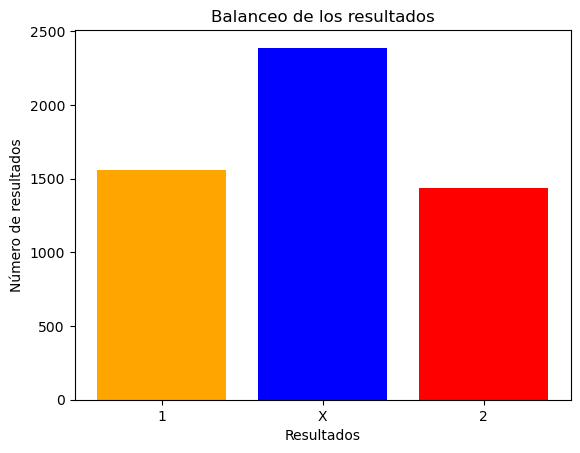

In [12]:
balanceo = df_partidos.resultado.value_counts()
plt.bar(balanceo.index, balanceo.values, color = ['blue','orange','red'])
plt.title('Balanceo de los resultados')
plt.xlabel('Resultados')
plt.ylabel('Número de resultados')
etiquetas = ['X','1','2']
plt.xticks(balanceo.index, etiquetas);

In [5]:
columnas_importantes = [col for col in df_partidos.columns if ('id_' not in col) and ('les-' not in col) and ('titu-' not in col)  and ('index' not in col)  and ('goles_' not in col)  and ('_id' not in col)  and ('fecha' not in col)  and ('season' not in col)]

df_filtrado = df_partidos[columnas_importantes]

In [6]:
df_filtrado.head()

,resultado,arbitro,estadio,shots_on_goal_local,shots_on_goal_away,shots_off_goal_local,shots_off_goal_away,total_shots_local,total_shots_away,blocked_shots_local,...,yellow_cards_local,yellow_cards_away,red_cards_local,red_cards_away,goalkeeper_saves_local,goalkeeper_saves_away,total_pass_local,total_pass_away,tiros_para_marcar_local,tiros_para_marcar_away
0,1,"Alfonso Alvarez Izquierdo, Spain",Estadio Vicente Calderón (Madrid),5.0,3.0,5.0,4.0,0.0,0.0,0.0,...,2.0,3.0,0.0,0.0,2.0,3.0,0.0,0.0,9.25,11.333333
1,1,"Carlos Velasco Carballo, Spain",Estadio Ramón Sánchez Pizjuán (Sevilla),6.0,1.0,3.0,7.0,0.0,0.0,0.0,...,4.0,5.0,0.0,1.0,4.0,4.0,0.0,0.0,9.00,7.500000
2,0,"Carlos Clos Gomez, Spain",Estadio Manuel Martínez Valero (Elche),7.0,3.0,5.0,6.0,0.0,0.0,0.0,...,4.0,2.0,0.0,0.0,1.0,5.0,0.0,0.0,25.00,12.000000
3,1,"Alberto Undiano, Spain",Estadio Municipal de Riazor (A Coruña (La Coru...,7.0,5.0,4.0,8.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,5.0,6.0,0.0,0.0,44.00,11.333333
4,2,"Fernando Teixeira Vitienes, Spain",Estadio La Rosaleda (Málaga),8.0,5.0,2.0,2.0,0.0,0.0,0.0,...,4.0,5.0,0.0,1.0,3.0,6.0,0.0,0.0,6.00,11.000000


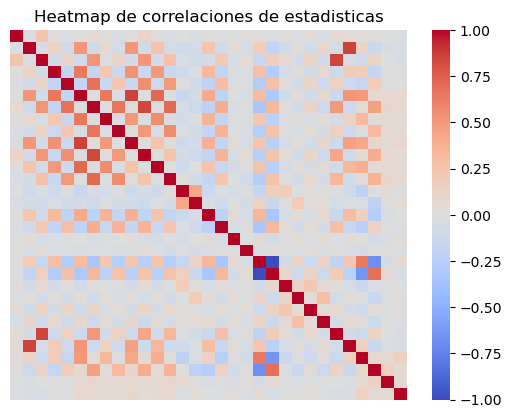

In [27]:
corr = df_filtrado.corr()

sns.heatmap(corr, cmap='coolwarm', annot = False, xticklabels=False, yticklabels=False)
plt.title('Heatmap de correlaciones de estadisticas')
plt.show()

In [9]:
corr

,resultado,shots_on_goal_local,shots_on_goal_away,shots_off_goal_local,shots_off_goal_away,total_shots_local,total_shots_away,blocked_shots_local,blocked_shots_away,shots_insidebox_local,...,yellow_cards_local,yellow_cards_away,red_cards_local,red_cards_away,goalkeeper_saves_local,goalkeeper_saves_away,total_pass_local,total_pass_away,tiros_para_marcar_local,tiros_para_marcar_away
resultado,1.000000,-0.026147,0.251480,0.013664,-0.029384,-0.002423,0.075928,0.020951,-0.033890,-0.012655,...,0.020793,-0.024361,0.032061,-0.052424,0.059198,0.030593,0.026953,0.013857,-0.005780,-0.024258
shots_on_goal_local,-0.026147,1.000000,-0.034087,0.123057,-0.087374,0.508924,-0.105404,0.077359,-0.074418,0.512898,...,-0.086087,0.025128,-0.084858,0.097106,-0.057416,0.854047,0.124131,-0.125422,-0.041372,-0.035363
shots_on_goal_away,0.251480,-0.034087,1.000000,-0.079199,0.104550,-0.080825,0.524288,-0.031237,0.113861,-0.067405,...,0.068599,-0.064041,0.117882,-0.095911,0.849540,-0.042909,-0.103276,0.113448,-0.003798,-0.051092
shots_off_goal_local,0.013664,0.123057,-0.079199,1.000000,-0.186417,0.654567,-0.178493,0.230341,-0.132096,0.534218,...,-0.071593,0.022523,-0.058991,0.071030,-0.106982,0.193406,0.182372,-0.166094,-0.008814,0.004478
shots_off_goal_away,-0.029384,-0.087374,0.104550,-0.186417,1.000000,-0.173943,0.672700,-0.140208,0.229829,-0.147350,...,0.015626,-0.080359,0.103811,-0.105284,0.154112,-0.115753,-0.158007,0.181882,0.005039,-0.006082
total_shots_local,-0.002423,0.508924,-0.080825,0.654567,-0.173943,1.000000,0.000454,0.655921,-0.029487,0.852211,...,-0.088257,0.031777,-0.084078,0.091196,-0.119825,0.522391,0.494583,0.073536,0.069757,0.084115
total_shots_away,0.075928,-0.105404,0.524288,-0.178493,0.672700,0.000454,1.000000,-0.019814,0.661793,0.009580,...,0.030042,-0.089917,0.114095,-0.127739,0.502808,-0.131455,0.046169,0.461606,0.091819,0.063476
blocked_shots_local,0.020951,0.077359,-0.031237,0.230341,-0.140208,0.655921,-0.019814,1.000000,-0.027617,0.502118,...,-0.017391,0.029909,-0.034688,0.045450,-0.070099,0.147953,0.330656,0.023523,0.048703,0.053928
blocked_shots_away,-0.033890,-0.074418,0.113861,-0.132096,0.229829,-0.029487,0.661793,-0.027617,1.000000,-0.004219,...,0.002682,-0.040445,0.032824,-0.061383,0.153003,-0.106405,-0.013669,0.319416,0.068448,0.054001
shots_insidebox_local,-0.012655,0.512898,-0.067405,0.534218,-0.147350,0.852211,0.009580,0.502118,-0.004219,1.000000,...,-0.068973,0.029679,-0.073150,0.087592,-0.103153,0.464997,0.423671,0.092259,0.060494,0.085990


In [23]:
target_corr = corr['resultado'][(corr['resultado'] > 0.1) | (corr['resultado'] < -0.1)]

In [24]:
target_corr

resultado               1.000000
shots_on_goal_away      0.251480
shots_insidebox_away    0.127896
Name: resultado, dtype: float64

In [29]:
n = 10 # Número de correlaciones a obtener
top_corr = (corr.abs().where(np.triu(np.ones(corr.shape), k=1).astype(np.bool)).stack().nlargest(n))
top_corr

C:\Users\gonve\AppData\Local\Temp\ipykernel_24024\911318597.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  top_corr = (corr.abs().where(np.triu(np.ones(corr.shape), k=1).astype(np.bool)).stack().nlargest(n))


ball_possession_local  ball_possession_away      1.000000
shots_on_goal_local    goalkeeper_saves_away     0.854047
total_shots_local      shots_insidebox_local     0.852211
shots_on_goal_away     goalkeeper_saves_local    0.849540
total_shots_away       shots_insidebox_away      0.842623
                       shots_outsidebox_away     0.716500
total_shots_local      shots_outsidebox_local    0.714993
ball_possession_local  total_pass_away           0.683222
ball_possession_away   total_pass_away           0.683222
shots_off_goal_away    total_shots_away          0.672700
dtype: float64

# Entrenamiento modelo

In [18]:
X = df_partidos.drop(['index', 'fixture_id','resultado', 'goles_local', 'goles_visitante','goles_descanso_local','goles_descanso_visitante','fecha_timestamp' ], axis=1)
y = df_partidos['resultado']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size=0.20)

In [15]:
# Columnas categóricas
categorical_columns = ['arbitro', 'estadio']

# Pipeline para codificar la columna 'arbitro' con OneHotEncoder
arbitro_pipeline = Pipeline([
    ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

# Pipeline para codificar la columna 'estadio' con TargetEncoder
estadio_pipeline = Pipeline([
    ('target', TargetEncoder())
])

# ColumnTransformer para aplicar los pipelines a las columnas correspondientes
preprocessor = ColumnTransformer([
    ('arbitro', arbitro_pipeline, ['arbitro']),
    ('estadio', estadio_pipeline, ['estadio']),
    ], remainder = "passthrough")

# Pipeline final con el preprocesamiento y el modelo RandomForestClassifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    #('scaler', StandardScaler()), #En este caso el escalado de variables funciona mucho peor
    ('pca', PCA()),
    ('rfc', RandomForestClassifier())
])



In [ ]:
rand_forest_param = {
    'pca__n_components': [20,25,30],
    'rfc__n_estimators': [50,70,90],
    'rfc__max_depth': [23, 25,27],
    'rfc__max_features': [13,12,15]
    }

gs_rand_forest = GridSearchCV(pipeline,
                            rand_forest_param,
                            cv=3,
                            scoring="accuracy",
                            verbose=1,
                            n_jobs=-1)

In [ ]:
%%time
gs_rand_forest.fit(X, y)

In [ ]:
print('Best params: ', gs_rand_forest.best_params_)
print('Best model: ', gs_rand_forest.best_estimator_)
y_pred_rfc = gs_rand_forest.predict(datos_nuevos)
print('Accuracy:', accuracy_score(y_test, y_pred_rfc))
print(classification_report(y_test, y_pred_rfc))

In [19]:
# Columnas categóricas
categorical_columns = ['arbitro', 'estadio']

# Pipeline para codificar la columna 'arbitro' con OneHotEncoder
arbitro_pipeline = Pipeline([
    ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

# Pipeline para codificar la columna 'estadio' con TargetEncoder
estadio_pipeline = Pipeline([
    ('target', TargetEncoder())
])

# ColumnTransformer para aplicar los pipelines a las columnas correspondientes
preprocessor = ColumnTransformer([
    ('arbitro', arbitro_pipeline, ['arbitro']),
    ('estadio', estadio_pipeline, ['estadio']),
    ], remainder = "passthrough")

# Pipeline final con el preprocesamiento y el modelo RandomForestClassifier
pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor),
    #('scaler', StandardScaler()), #En este caso el escalado de variables funciona mucho peor
    ('pca', PCA()),
    ('xgb', xgb.XGBClassifier())
])

In [20]:
xgb_param = {
    'pca__n_components': [25,30,35],
    'xgb__n_estimators': [300, 500, 700],
    'xgb__learning_rate': [0.1],
    'xgb__max_depth': [27,25],
    'xgb__subsample': [0.5, 0.8],
    'xgb__colsample_bytree': [0.5, 0.6],
    'xgb__min_child_weight': [1, 2],
    'xgb__gamma': [0]
    }

gs_xgb = GridSearchCV(pipeline_xgb,
                            xgb_param,
                            cv=3,
                            scoring="accuracy",
                            verbose=1,
                            n_jobs=-1)

In [21]:
%%time
gs_xgb.fit(X, y)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
CPU times: total: 5min 9s
Wall time: 54min 58s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('arbitro',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['arbitro']),
                                                                        ('estadio',
                                                                         Pipeline(steps=[('target',
                                                                                          TargetEncoder())]),
                                                                         ['estadio'])])),
                                       ('pca', PCA()),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booste...
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'pca__n_components': [25, 30, 35],
                         'xgb__colsample_bytree': [0.5, 0.6], 'xgb__gamma': [0],
                         'xgb__learning_rate': [0.1],
                         'xgb__max_depth': [27, 25],
                         'xgb__min_child_weight': [1, 2],
                         'xgb__n_estimators': [300, 500, 700],
                         'xgb__subsample': [0.5, 0.8]},
             scoring='accuracy', verbose=1)

In [173]:
print('Best params: ', gs_xgb.best_params_)
print('Best model: ', gs_xgb.best_estimator_)
y_pred_xgb = gs_xgb.predict(datos_nuevos)
print('Accuracy:', accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

Best params:  {'pca__n_components': 30, 'xgb__colsample_bytree': 0.6, 'xgb__gamma': 0, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 25, 'xgb__min_child_weight': 2, 'xgb__n_estimators': 700, 'xgb__subsample': 0.5}
Best model:  Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('arbitro',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['arbitro']),
                                                 ('estadio',
                                                  Pipeline(steps=[('target',
                                                                   TargetEncoder())]),
                                                 

**Best params**:  {'pca__n_components': 30, 'xgb__colsample_bytree': 0.8, 'xgb__gamma': 0, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 25, 'xgb__min_child_weight': 1, 'xgb__n_estimators': 500, 'xgb__subsample': 0.5}

**Accuracy**: 0.82

In [1]:
gs_xgb.predict_proba(datos_nuevos)

NameError: name 'gs_xgb' is not defined